**Task 1**: Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-**py**

In [7]:
from skimage import data, util
from skimage.io import imshow, show

coffee_image = data.coffee()
print("Image shape:", coffee_image.shape)
print("Data type:", coffee_image.dtype)

Image shape: (400, 600, 3)
Data type: uint8


**Task 2**: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

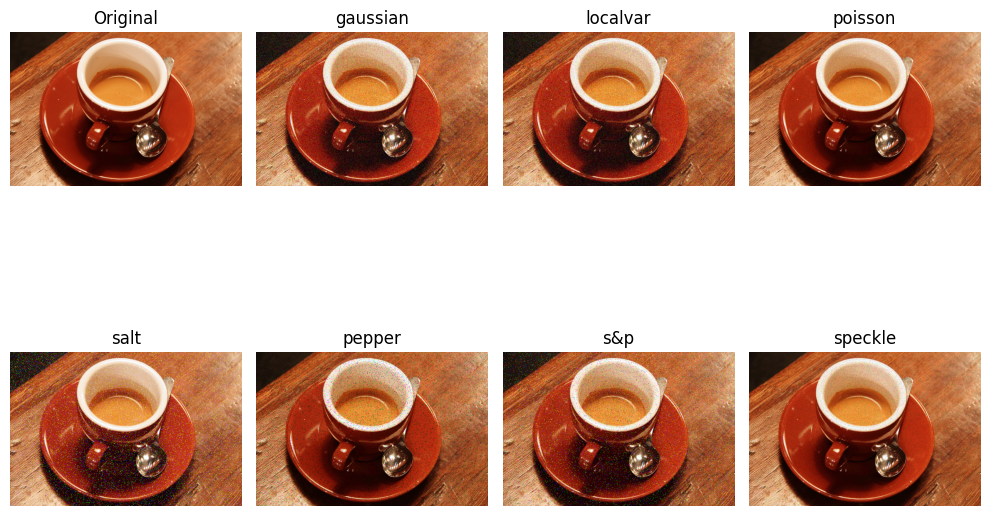

In [8]:
import matplotlib.pyplot as plt
# List of noise types
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']
# Dictionary to store noisy images
noisy_images = {}
for noise in noise_types:
  noisy_images[noise] = util.random_noise(coffee_image, mode=noise)
fig, axes = plt.subplots(2, 4, figsize=(10, 8))
axes = axes.ravel()
axes[0].imshow(coffee_image)
axes[0].set_title("Original")
axes[0].axis('off')
for i, noise in enumerate(noise_types, start=1):
    axes[i].imshow(noisy_images[noise])
    axes[i].set_title(noise)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Task 3**: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

We choose noise type *salt* and three different noise levels: 0.02, 0.05 and 0.1

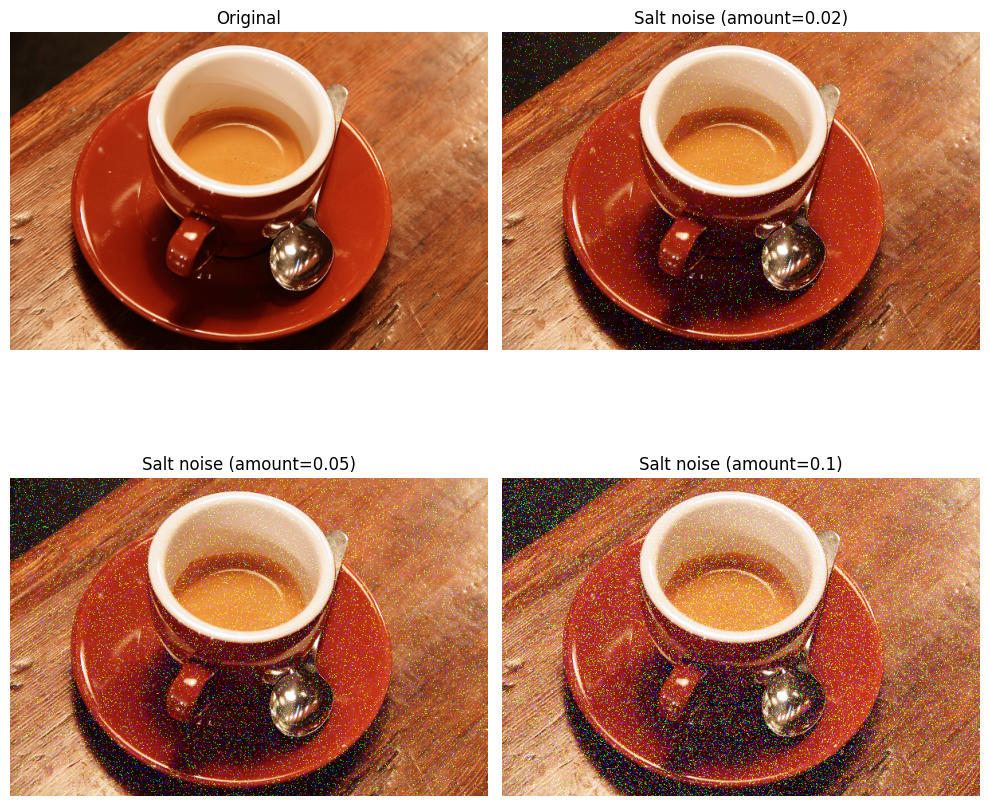

In [9]:
noise_levels = [0.02, 0.05, 0.1]

noisy_images = [util.random_noise(coffee_image, mode='salt', amount=level) for level in noise_levels]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].imshow(coffee_image)
axes[0].set_title("Original")
axes[0].axis('off')

for i, noisy in enumerate(noisy_images, start=1):
    axes[i].imshow(noisy)
    axes[i].set_title(f"Salt noise (amount={noise_levels[i-1]})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Task 4**: The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the three noisy images generated in the previus task. Represent and comment the results.

Intentionally we use slightly stronger sigma values (1.5, 2, 3) than typical small values in order to make the effect of smoothing more visible, so that the differences in noise reduction and blurring of details can be clearly observed.

In [10]:
from skimage.filters import gaussian

sigma_values = [0.5, 1.5, 3] # small sigma -> slight smoothing
smoothed_images = {}

for i, noisy in enumerate(noisy_images):
    smoothed_images[i] = [gaussian(noisy, sigma=s) for s in sigma_values]


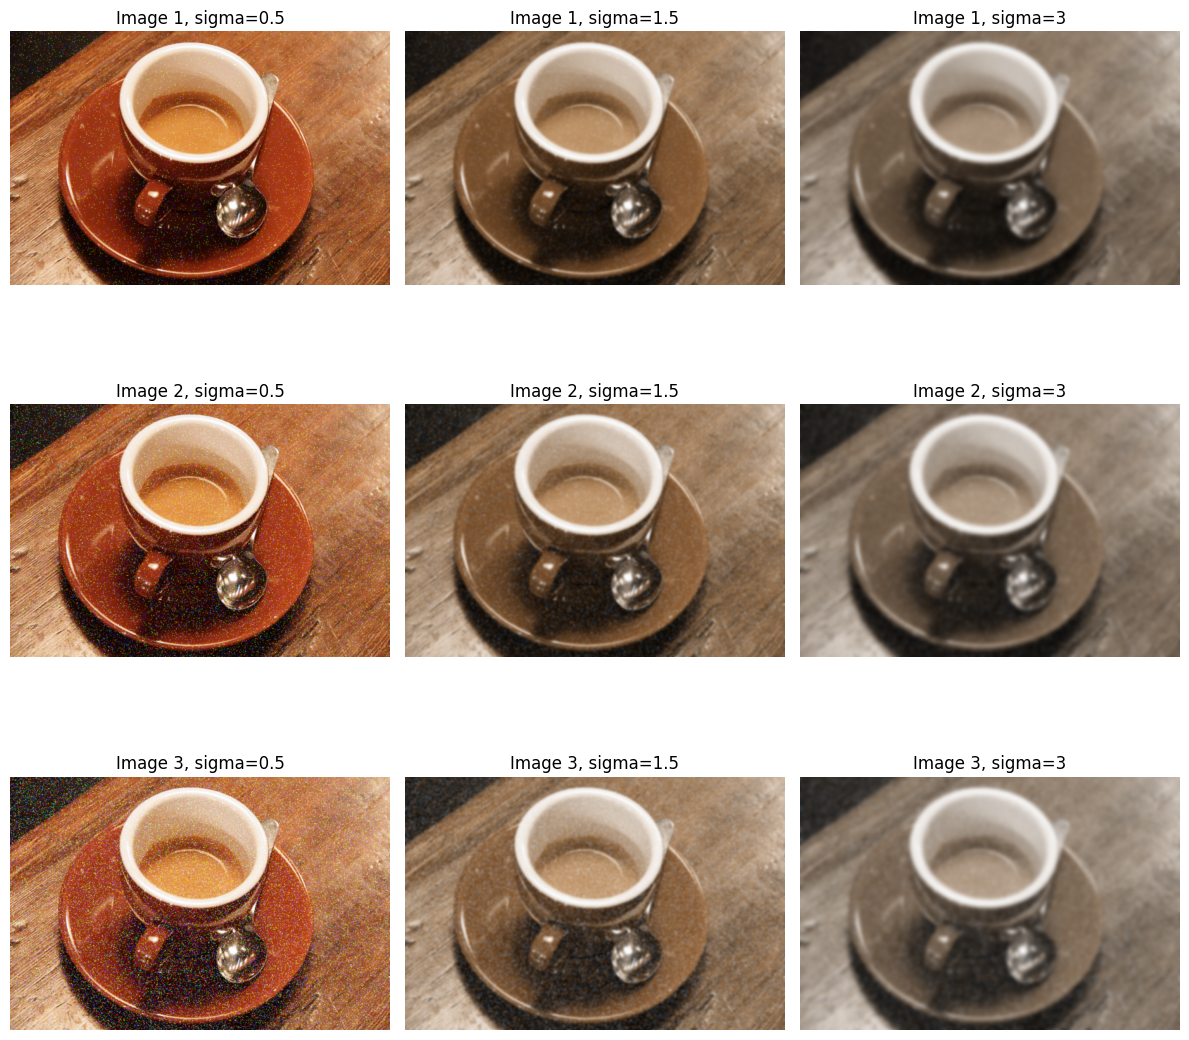

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

for i in range(3):
    for j, sigma in enumerate(sigma_values):
        idx = i*3 + j
        axes[idx].imshow(smoothed_images[i][j])
        axes[idx].set_title(f"Image {i+1}, sigma={sigma}")
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

Small sigma (0.5) → only slight smoothing; noise is reduced but edges are mostly preserved.

Medium sigma (1.5) → more noticeable smoothing; some edges start to blur.

Large sigma (3) → strong smoothing; most of the noise is gone, but edges and fine details are blurred.

The larger the sigma, the smoother the image, but also the greater the loss of detail.

**Task 5**: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

Fraction of edges: 0.1504
Fraction of bricks: 0.8496


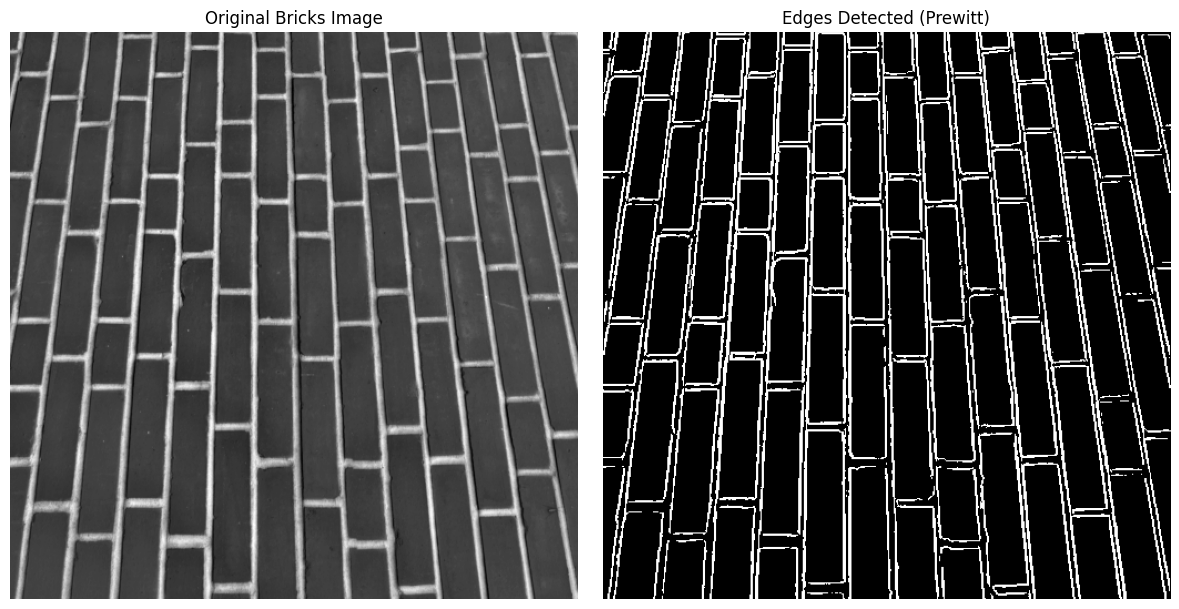

In [12]:
from skimage import filters
import numpy as np

image = data.brick()
edges = filters.prewitt(image)

# Threshold edges to get a binary edge map
threshold = 0.1
edges_binary = edges > threshold

fraction_edges = np.sum(edges_binary) / edges_binary.size
fraction_bricks = 1 - fraction_edges

print(f"Fraction of edges: {fraction_edges:.4f}")
print(f"Fraction of bricks: {fraction_bricks:.4f}")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Bricks Image")
axes[0].axis('off')

axes[1].imshow(edges_binary, cmap='gray')
axes[1].set_title("Edges Detected (Prewitt)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

The Prewitt filter detected that approximately **15%** of the image corresponds to edges, while the remaining **85%** represents the brick surfaces. This means that only a small portion of the image contains intensity transitions (edges), mainly outlining the boundaries between the bricks, while most of the pixels belong to the flat brick regions.

**Task 6**: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

In [13]:
img = data.grass() # grayscale image

# Function to compare original and filtered image
def plot_comparison(original, filtered, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(filtered, cmap='gray')
    axes[1].set_title(title)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

###High pass filter

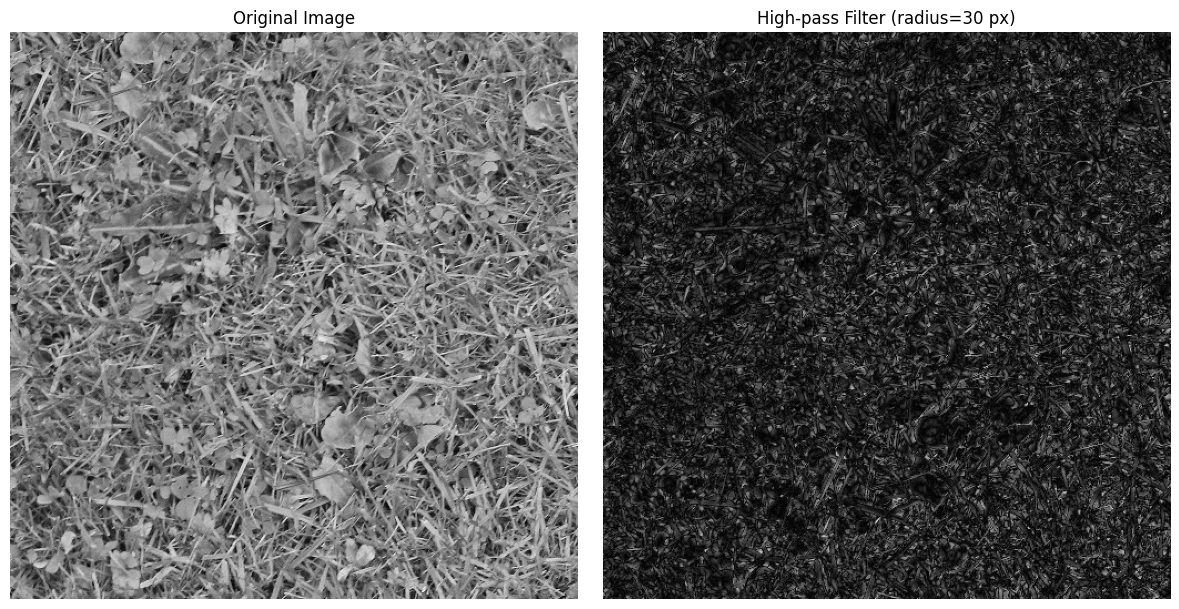

In [14]:
rows, cols = img.shape
crow, ccol = np.int32(rows/2), np.int32(cols/2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Zero out the low frequencies (center of the spectrum)
radius = 30
fshift[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0

# Inverse FFT to get filtered image
f_ishift = np.fft.ifftshift(fshift)
img_high = np.fft.ifft2(f_ishift)
img_high = np.abs(img_high)

plot_comparison(img, img_high, 'High-pass Filter (radius={} px)'.format(radius))

### Low-pass filter

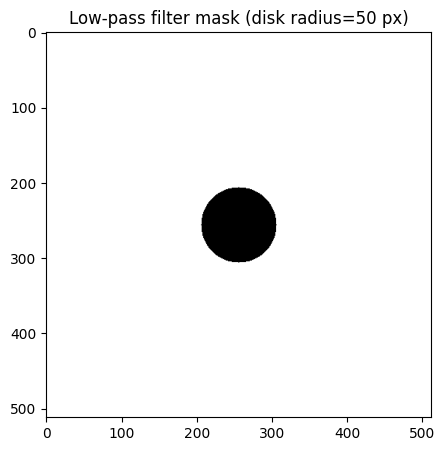

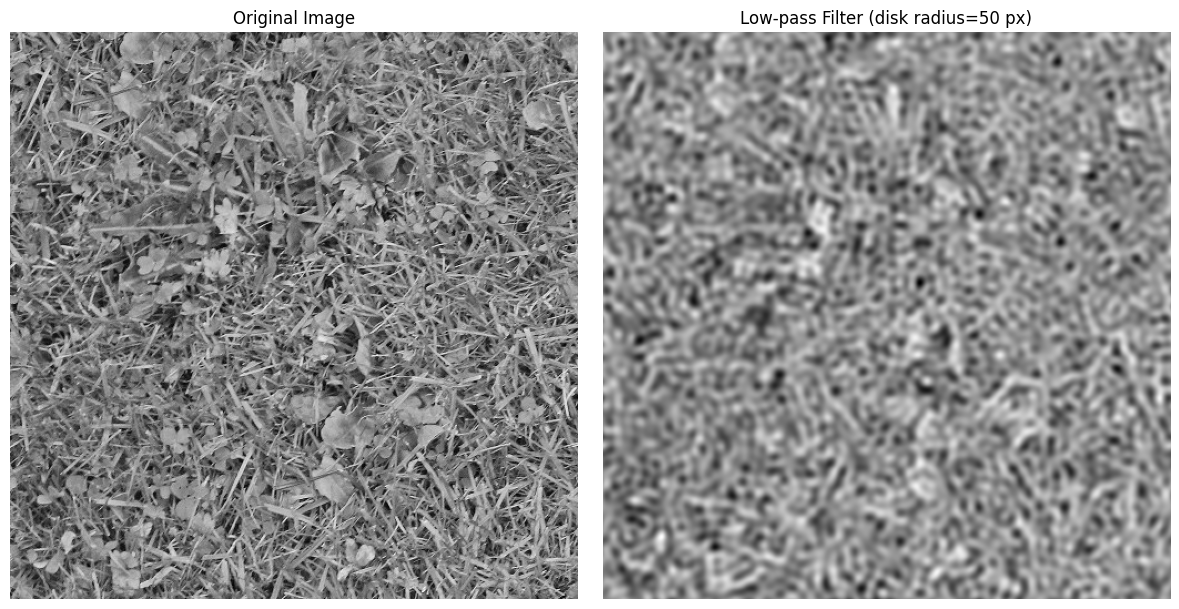

In [15]:
nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows/2, ncols/2
disk_radius = 50

# Mask: True outside the disk
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > disk_radius**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Apply mask: zero out high frequencies
fshift[outer_disk_mask] = 0

# Inverse FFT to get filtered image
f_ishift = np.fft.ifftshift(fshift)
img_low = np.fft.ifft2(f_ishift)
img_low = np.abs(img_low)

# Show LPF mask
plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask, cmap=plt.cm.gray)
plt.title('Low-pass filter mask (disk radius={} px)'.format(disk_radius))
plt.show()

plot_comparison(img, img_low, 'Low-pass Filter (disk radius={} px)'.format(disk_radius))


The low-frequency components correspond to smooth, slowly changing areas in the image, preserving large-scale patterns but blurring fine details. The high-frequency components represent edges and fine textures, highlighting small details while removing smooth regions. In the grass image, the low-pass filter keeps the overall brightness variations, whereas the high-pass filter emphasizes the individual blades and textures.


**Task 7**: Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk

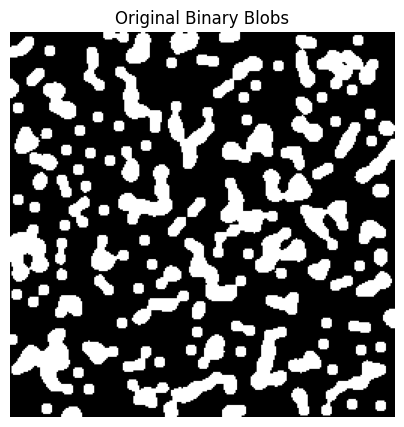

In [16]:
from skimage import morphology

# Generate a binary blobs image
blobs = data.binary_blobs(length=256, blob_size_fraction=0.05, n_dim=2, volume_fraction=0.3)

plt.figure(figsize=(5,5))
plt.imshow(blobs, cmap='gray')
plt.title("Original Binary Blobs")
plt.axis('off')
plt.show()

In [17]:
# Disk-shaped structuring element with radius 3
selem = morphology.disk(3)

In [18]:
# Apply consecutive erosions until all blobs are gone
eroded = blobs.copy()
count = 0

while np.any(eroded):  # while there is at least one foreground pixel
    eroded = morphology.erosion(eroded, selem)
    count += 1

print(f"Number of erosions needed to remove all blobs: {count}")

Number of erosions needed to remove all blobs: 4


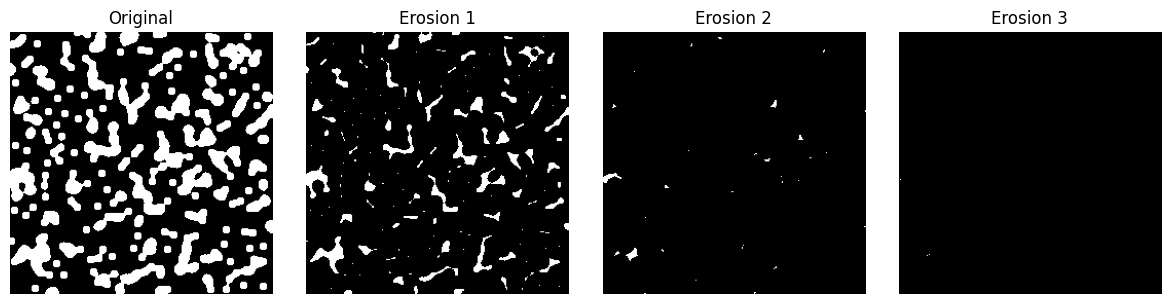

In [19]:
# Visualization of first few erosions
eroded = blobs.copy()
fig, axes = plt.subplots(1, 4, figsize=(12,3))
axes[0].imshow(eroded, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

for i in range(1, 4):
    eroded = morphology.erosion(eroded, selem)
    axes[i].imshow(eroded, cmap='gray')
    axes[i].set_title(f"Erosion {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The number of consecutive erosions needed to remove all blobs depends on the **size of the blobs** and the **radius of the structuring element**. Each erosion shrinks the blobs by approximately the radius of the disk in all directions, so larger blobs or smaller structuring elements require more erosions. This explains why the total number of erosions roughly corresponds to the maximum radius of the blobs relative to the structuring element.

**Team Members**:
- Apostolia Maria Sofianopoulou
- Paula Eva Wagner
- Sandra Catalina Parra Navarrete